In [2]:
# Show the figures / plots inside the notebook
%matplotlib inline
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

from skimage.color import rgb2gray,rgb2hsv
from skimage.util import random_noise
from skimage.exposure import histogram
from matplotlib.pyplot import bar

In [3]:
def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

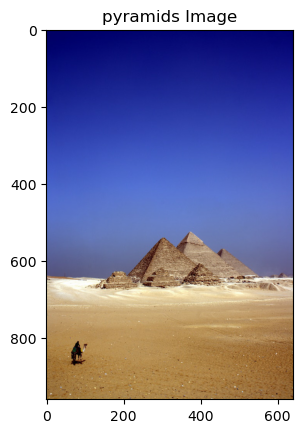

In [4]:
pyramids = io.imread('pyramids.jpeg') # Read an image from a file and returns numPy array

images = [pyramids]
titles = ["pyramids Image"]
show_images(images,titles)

# io.imshow(pyramids) # Display an image
# io.show() # for some reason this disappears when i use it <matplotlib.image.AxesImage at 0x17b67b2c500>


In [5]:
# Use this function to show a histogram
# The image should be gray-scale and should range from 0 to 1
def showHist(img,histogramImg):
    plt.figure()
    bar(histogramImg[1]*255, histogramImg[0], width=0.8, align='center')
    plt.xlabel('Intensity Value')
    plt.ylabel('Number of Pixels')

In [6]:
import os
# I created this function because I wanted to see the mapping of values to pixel positions 
# and understand things better 
def ShowPixelsValues(image, output_file=None):
    # Create the directory if it doesn't exist
    output_dir = "BassemDebug"
    os.makedirs(output_dir, exist_ok=True)
    
    if not output_file:
        output_file = "output_image_values.txt"
    
    # Prepend the directory to the output file name
    output_file = os.path.join(output_dir, output_file)
    
    with open(output_file, 'w') as file:
        file.write("Image array Values with positions:\n")
        h, w, c = None, None, None
        if len(image.shape) == 2:
            h, w = image.shape
        elif len(image.shape) == 3:
            h, w, c = image.shape
        else:
            file.write("Error: Image.shape returns dimension more than 3\n")
            return
        
        for i in range(h):
            for j in range(w):
                file.write(f"Pixel ({i}, {j}):   {image[i, j]}\n")

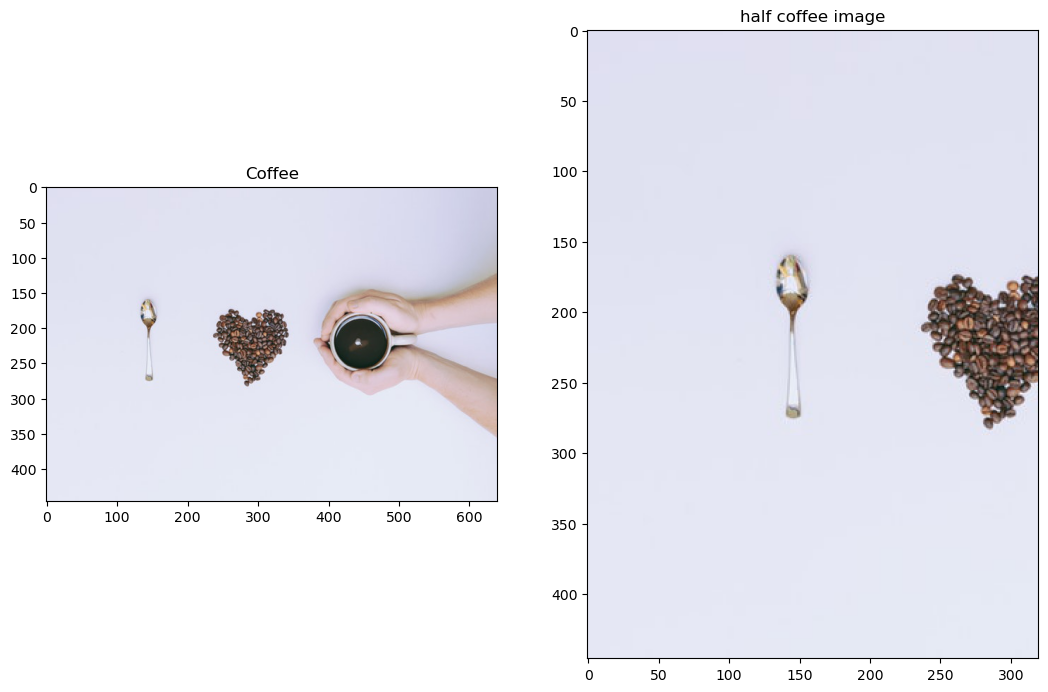

In [7]:
'''
@TODO:
Requirement #1 
-Read and print image 'coffee'  
-Show and print half of the  image
-----hint :use the attribute shape of numpy to get the image object dimentions
'''
# Read and print image 'coffee'  
coffee = io.imread('coffee.jpeg') 

# Print the NumPy array of the original image with positions
# ShowPixelsValues(coffee)

# Show and print half of the  image
height, width, _ = coffee.shape
half_coffee = coffee[:, :width // 2]

images = [coffee,half_coffee]
titles = ["Coffee","half coffee image"]
show_images(images,titles)


# Print the NumPy array of the half image with positions
# ShowPixelsValues(half_coffee)

In [8]:
'''
@TODO:
Requirement #2 
RGB to gray and HSV:
1- Write a function 'gray_image' that takes an image as input , then
    -get the gray scale of the image, then
    -display original image and the gray scale one side by side (subplot).
    -hint: use rgb2gray to get the graylevel of the image
- test your function with the image 'pyramids'
    
2- Write a function 'HSV_image' that takes an image as input , then
   -show the RGB image and the (3 channels of HSV image each channel in separated form ) one side by side (subplot).
   -hint: -use rgb2hsv (to get the hsv representation of the image).
          -To separately get the Hue, Saturation and Value channels, use hsvImg[:,:,X], 
           where hsvImg is the hsv representation of the image. 
           Hue is the first channel, Saturation is the second and value is the last channel.
- test your function for the images in HSV Folder. And comment on the results. 
'''

"\n@TODO:\nRequirement #2 \nRGB to gray and HSV:\n1- Write a function 'gray_image' that takes an image as input , then\n    -get the gray scale of the image, then\n    -display original image and the gray scale one side by side (subplot).\n    -hint: use rgb2gray to get the graylevel of the image\n- test your function with the image 'pyramids'\n    \n2- Write a function 'HSV_image' that takes an image as input , then\n   -show the RGB image and the (3 channels of HSV image each channel in separated form ) one side by side (subplot).\n   -hint: -use rgb2hsv (to get the hsv representation of the image).\n          -To separately get the Hue, Saturation and Value channels, use hsvImg[:,:,X], \n           where hsvImg is the hsv representation of the image. \n           Hue is the first channel, Saturation is the second and value is the last channel.\n- test your function for the images in HSV Folder. And comment on the results. \n"

In [9]:
'''
@Bassem Explanation: 
    Human eye preciecs brightness with specific weght of each color channel 0.29 for red and 0.58 for green and 0.11 for blue 
    thats why we use weighted sum 
'''
def gray_image(image):
    gray_image = rgb2gray(image)
    
    # figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6)) # row, col, width, height  2 coloumns so axes[0] & axes[1]
    
    # first subplot
    axes[0].imshow(image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')  # Hide the axis
    # ShowPixelsValues(image)
    # ShowPixelsValues(gray_image)

    # second subplot
    axes[1].imshow(gray_image, cmap='gray')
    axes[1].set_title('Grayscale Image')
    axes[1].axis('off')  # Hide the axis
    
    # Show the figure
    plt.show()

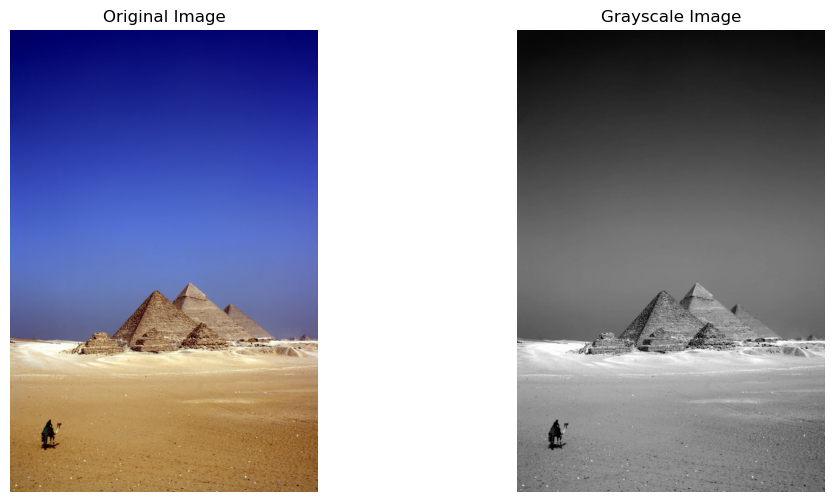

In [10]:
pyramids = io.imread('pyramids.jpeg') 
gray_image(pyramids)

In [11]:
# 2- Write a function 'HSV_image' that takes an image as input , then
#    -show the RGB image and the (3 channels of HSV image each channel 
# in separated form ) one side by side (subplot).
#    -hint: -use rgb2hsv (to get the hsv representation of the image).
#           -To separately get the Hue, Saturation and Value channels, use hsvImg[:,:,X], 
#            where hsvImg is the hsv representation of the image. 
#            Hue is the first channel, Saturation is the second and value is the last channel.
# - test your function for the images in HSV Folder. And comment on the results. 

def HSV_image(image):
    HSV_image=rgb2hsv(image)
    # ShowPixelsValues(image)
    
    # Getting Channels from HSV Image
    hue_channel = HSV_image[:, :, 0] # row, col, depth and each cell contains three depth values h s v
    saturation_channel = HSV_image[:, :, 1]
    value_channel = HSV_image[:, :, 2]

    # figure with subplots
    fig,axes = plt.subplots(1,5,figsize=(25, 5))
    
    # first subplot
    axes[0].imshow(image)
    axes[0].set_title("Orginal RGB Image")
    axes[0].axis("off")

    # second subplot
    axes[1].imshow(HSV_image)
    axes[1].set_title("HSV Image")
    axes[1].axis("off")

     # third subplot
    axes[2].imshow(hue_channel)
    axes[2].set_title("Hue Channel")
    axes[2].axis("off")

    # fourth subplots
    axes[3].imshow(saturation_channel)
    axes[3].set_title("Saturation Channel")
    axes[3].axis("off")

    # fifth subplot
    axes[4].imshow(value_channel)
    axes[4].set_title("Value Channel")
    axes[4].axis("off")
    
    
    

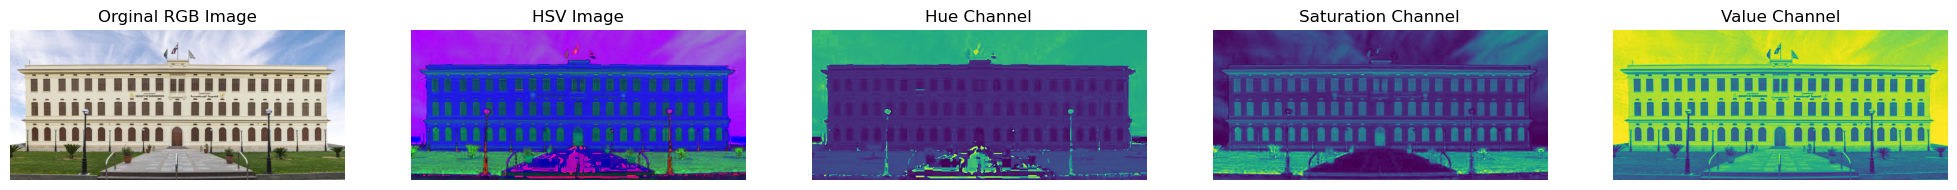

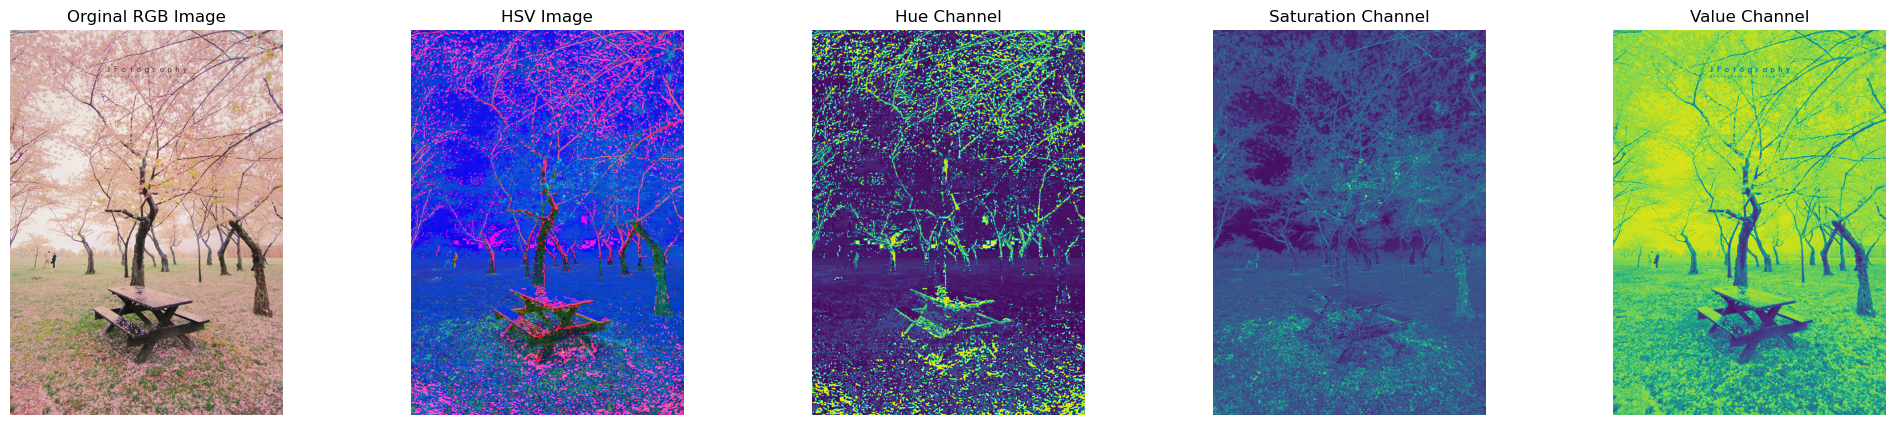

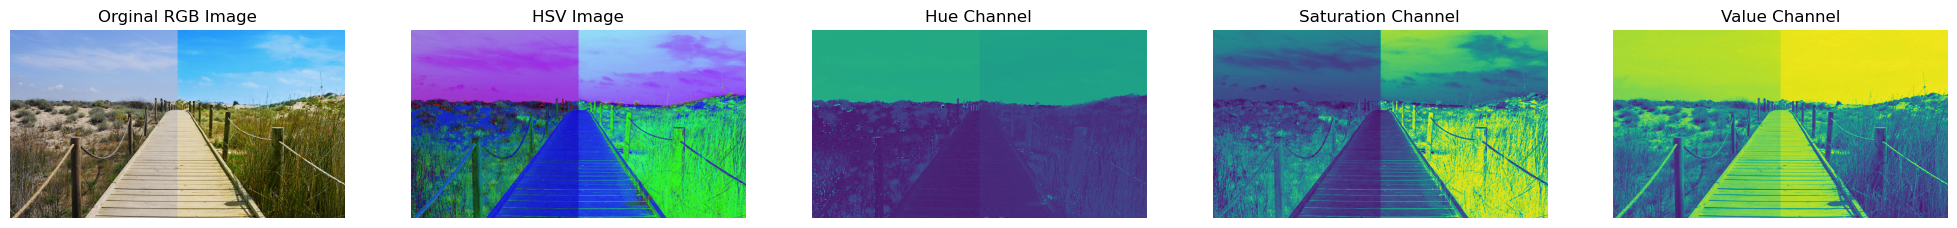

In [12]:
hsv_ex1=io.imread("hsv/ex1.png")
hsv_ex2=io.imread("hsv/ex2.jpg")
hsv_ex3=io.imread("hsv/ex3.jpg")
HSV_image(hsv_ex1)
HSV_image(hsv_ex2)
HSV_image(hsv_ex3)

# My comment analysis of Hsv channels:

# The Hue channel represents color variations independently of brightness and saturation, 
# making it useful for tasks such as segmentation and object detection.

# The Saturation channel indicates the intensity of colors,
# with vibrant areas appearing bright 
# and less saturated regions appearing darker.

# The Value channel (brightness) displays the light intensity in the image, 
# highlighting bright areas.


In [13]:
'''
Requirement 2 (Noise):
http://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise

1.For an image of your choice (the effect of noise must be obvious): 
    Read the image.
    Convert it to greyscale.
    Apply salt & pepper noise with 
    amount=0.05, 0.5 and 0.9
   
2. From the other images. Recommend one image that won’t be greatly affected by the noise and state why.    
    '''


'\nRequirement 2 (Noise):\nhttp://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise\n\n1.For an image of your choice (the effect of noise must be obvious): \n    Read the image.\n    Convert it to greyscale.\n    Apply salt & pepper noise with \n    amount=0.05, 0.5 and 0.9\n   \n2. From the other images. Recommend one image that won’t be greatly affected by the noise and state why.    \n    '

In [14]:
def ShowImages(images_with_titles):
    lengthOfImages=len(images_with_titles)
    fig, axes = plt.subplots(1, lengthOfImages, figsize=(lengthOfImages*5, 5))
    for i in range(lengthOfImages):
        axes[i].imshow(images_with_titles[i].image,cmap="gray")
        axes[i].set_title(images_with_titles[i].title)
        axes[i].axis('off')
    plt.show()

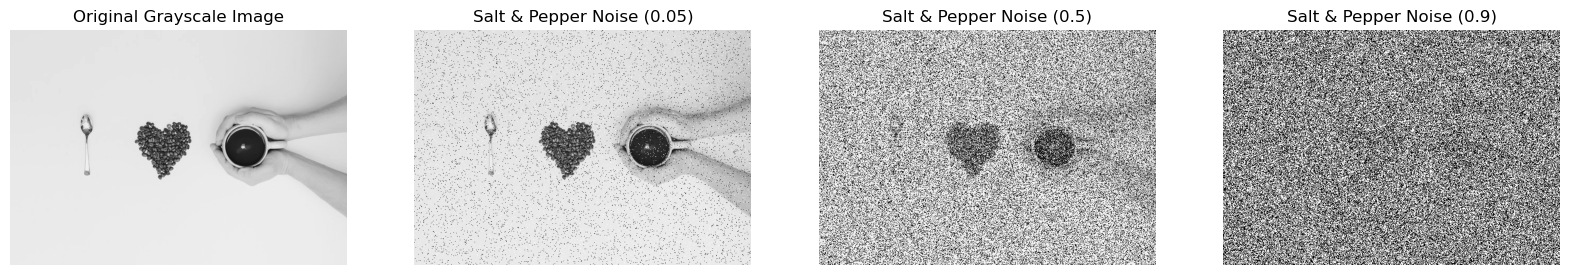

In [15]:
class ImageWithTitle:
    def __init__(self, image, title):
        self.image = image
        self.title = title

image = io.imread("coffee.jpeg")
gray_image = rgb2gray(image)
noisy_image_005 =random_noise(gray_image,mode='s&p',amount=0.05)
noisy_image_05 =random_noise(gray_image,mode='s&p',amount=0.5)
noisy_image_09 =random_noise(gray_image,mode='s&p',amount=0.9)
# ShowPixelsValues(gray_image,"gray_image")
# ShowPixelsValues(noisy_image_005,"noisy_image_09")
images_with_titles = [
    ImageWithTitle(gray_image, 'Original Grayscale Image'),
    ImageWithTitle(noisy_image_005, 'Salt & Pepper Noise (0.05)'),
    ImageWithTitle(noisy_image_05, 'Salt & Pepper Noise (0.5)'),
    ImageWithTitle(noisy_image_09, 'Salt & Pepper Noise (0.9)')
]
ShowImages(images_with_titles)


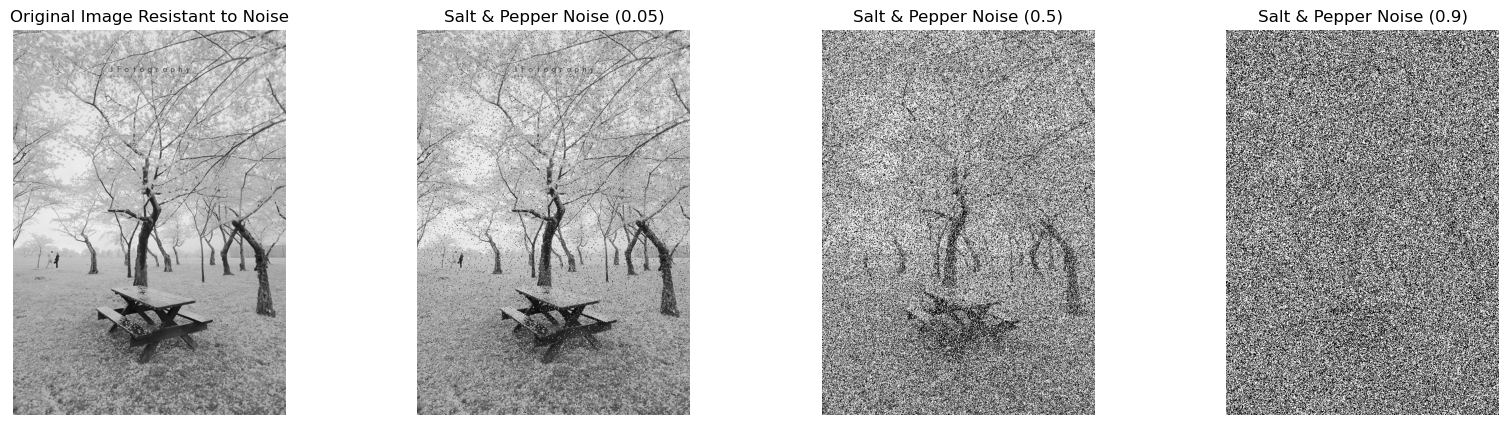

In [16]:
'''
2. From the other images. Recommend one image that won’t be greatly affected by the noise and state why.    

okay i would say that any that most of its colors are made of only 
-black and white pictures 
-a picture that is kind of have nature of randomoization like trees or textures like this 
'''
# Images that are resistant to salt and pepper noise
image_resistant_to_noise = io.imread("hsv/ex2.jpg")
grayscale_image_resistant_to_noise = rgb2gray(image_resistant_to_noise)

grayscale_image_resistant_to_noise_005 = random_noise(grayscale_image_resistant_to_noise, mode='s&p', amount=0.05)
grayscale_image_resistant_to_noise_05 = random_noise(grayscale_image_resistant_to_noise, mode='s&p', amount=0.5)
grayscale_image_resistant_to_noise_09 = random_noise(grayscale_image_resistant_to_noise, mode='s&p', amount=0.9)

images_resistant_to_noise = [
    ImageWithTitle(grayscale_image_resistant_to_noise, 'Original Image Resistant to Noise'),
    ImageWithTitle(grayscale_image_resistant_to_noise_005, 'Salt & Pepper Noise (0.05)'),
    ImageWithTitle(grayscale_image_resistant_to_noise_05, 'Salt & Pepper Noise (0.5)'),
    ImageWithTitle(grayscale_image_resistant_to_noise_09, 'Salt & Pepper Noise (0.9)')
]

ShowImages(images_resistant_to_noise)

In [17]:
'''
Requirement 3 (Histogram):

1- For the given images ( in histogram folder): 
    Read the image.
    Apply histogram and show it.
Hint
    A) Use histogram (image) to get histogram. Try different values for nbins (256,64,8), What does it mean?
    B) and function(showHist) to draw it.
** 2- Draw a grey-scale image that has uniform histogram 
same number of pixels for all intensity levels) using code only. Let the size of the image be 256x256.
use np.ones to draw image with ones.
'''

'\nRequirement 3 (Histogram):\n\n1- For the given images ( in histogram folder): \n    Read the image.\n    Apply histogram and show it.\nHint\n    A) Use histogram (image) to get histogram. Try different values for nbins (256,64,8), What does it mean?\n    B) and function(showHist) to draw it.\n** 2- Draw a grey-scale image that has uniform histogram \nsame number of pixels for all intensity levels) using code only. Let the size of the image be 256x256.\nuse np.ones to draw image with ones.\n'

In [18]:
# Use this function to show a histogram
# The image should be gray-scale and should range from 0 to 1
def showHist(img,histogramImg):
    plt.figure()
    bar(histogramImg[1]*255, histogramImg[0], width=0.8, align='center')

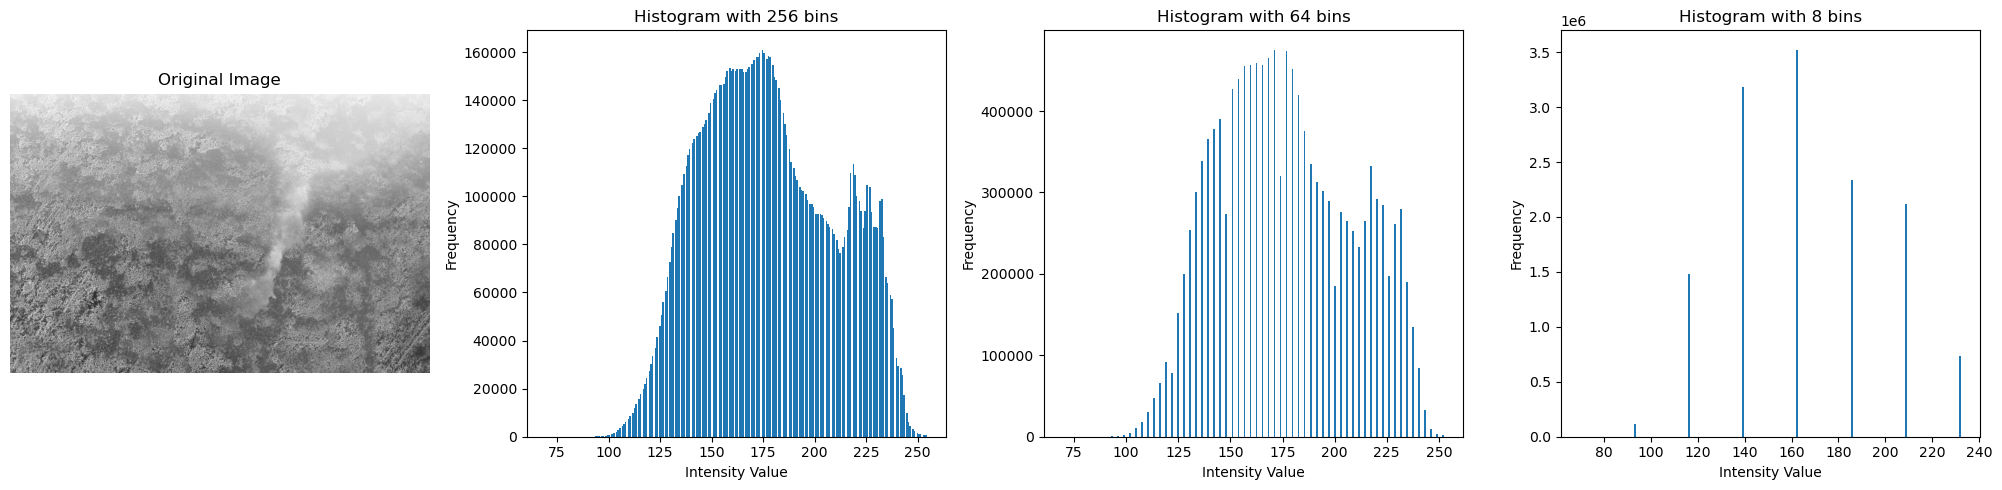

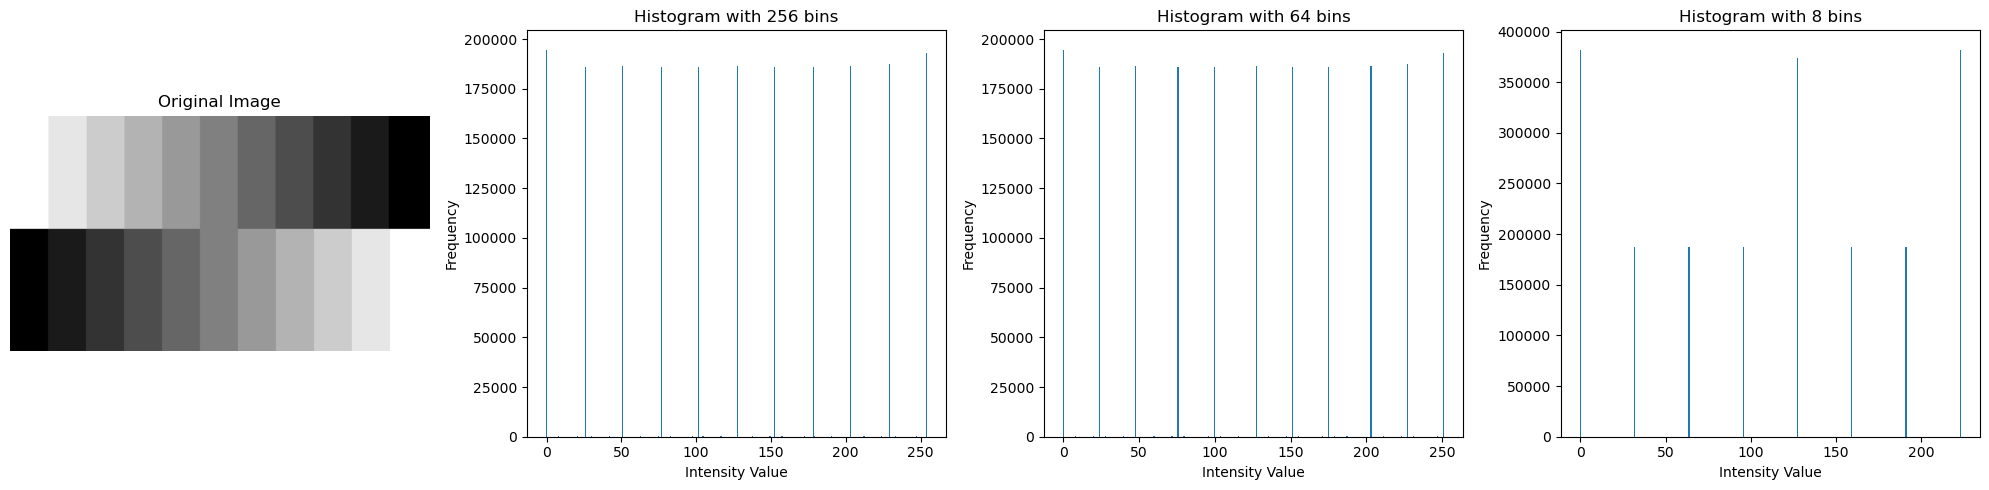

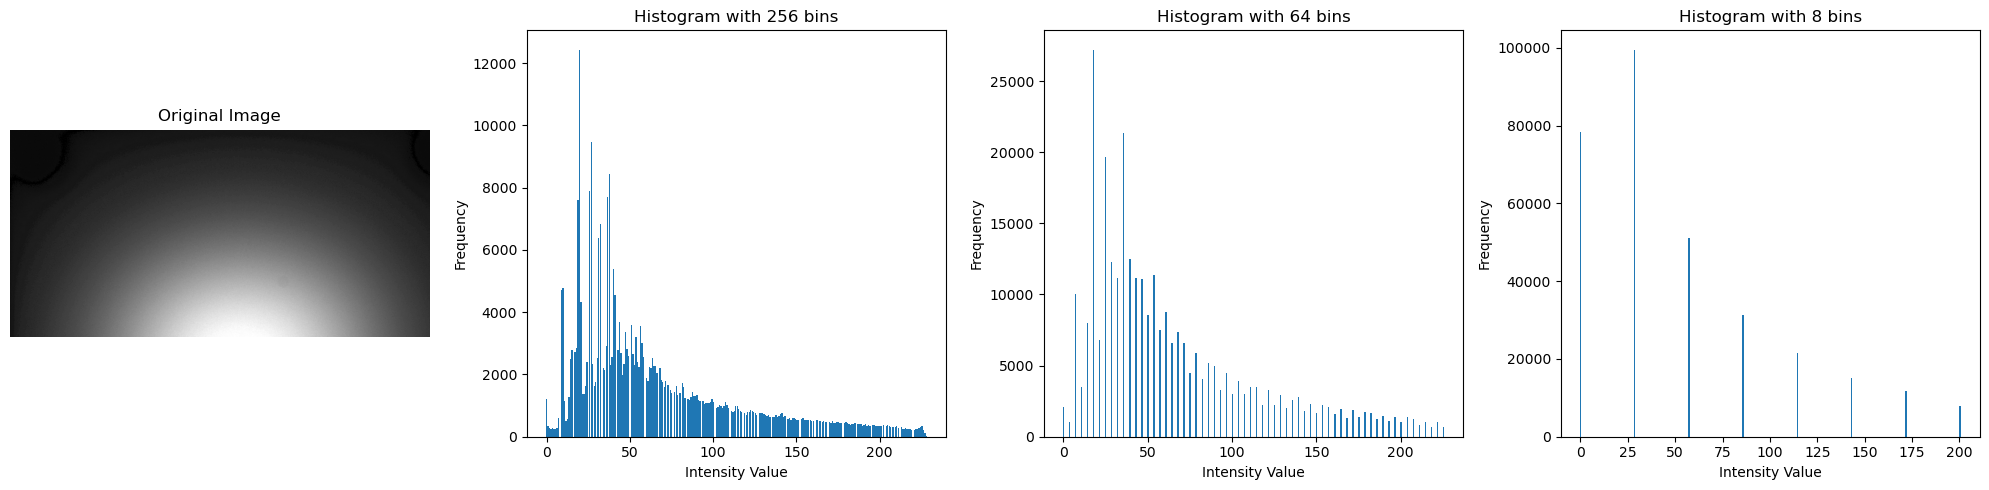

' \nhmm okay to understand what bins means we should first how that number is used by the histogram function \nlets say that the bins number is 256\nnp.histogram or any histogram probably needs two things values of y and x \nhow we divide the values of images in that x scale is \nby getting first the maximum and minimum value \nthen get difference \ndivide that difference by number of bins \nso for example if i have images values 0 1 2 3 4 5 6 7 8 9 10\nand i specified  number of bins to be 5 \nmax 10 min 0 diff 10 \n10/5 = 2 so the 0-2 2-4 4-6 6-8 8-10 that what the histogram will get the frequencey \nso if there were 4 pixels have values between 0 and 1.99999 then there will be one coloumn have value 4  \nsimply you will find that we divide scale of y into specific number and this is the bins \nif there is pixel values in every range then you will find the number of bins = number of coloums \n'

In [19]:
def display_image_and_histograms(image_path, nbins=256):
    # Read the image
    original_image = io.imread(image_path)
    
    # print(original_image.shape[2])
  
    # Convert to grayscale if the image is in RGB or RGBA format
    if len(original_image.shape) == 3:
        if original_image.shape[2] == 4:  # RGBA image
            original_image = original_image[:, :, :3]  # Discard the alpha channel
        image = rgb2gray(original_image)
    else:
        image = original_image  # Image is already in grayscale
    
    # figure
    fig, axes = plt.subplots(1,4, figsize=(20,5))
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis("off")
    # ShowPixelsValues(image,"testtt")
    # histogram with diff bin sizes 
    for i,nbins in enumerate([256, 64, 8],start=1):
        hist,bins = np.histogram(image,nbins)
        axes[i].bar(bins[:-1] * 255,hist,width=0.8, align='center')
        axes[i].set_title(f"Histogram with {nbins} bins")
        axes[i].set_xlabel('Intensity Value')
        axes[i].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

display_image_and_histograms('histogram/ex1.jpg')
display_image_and_histograms('histogram/ex2.png')
display_image_and_histograms('histogram/ex3.png')

# What does bins means in histogram ? 
''' 
hmm okay to understand what bins means we should first how that number is used by the histogram function 
lets say that the bins number is 256
np.histogram or any histogram probably needs two things values of y and x 
how we divide the values of images in that x scale is 
by getting first the maximum and minimum value 
then get difference 
divide that difference by number of bins 
so for example if i have images values 0 1 2 3 4 5 6 7 8 9 10
and i specified  number of bins to be 5 
max 10 min 0 diff 10 
10/5 = 2 so the 0-2 2-4 4-6 6-8 8-10 that what the histogram will get the frequencey 
so if there were 4 pixels have values between 0 and 1.99999 then there will be one coloumn have value 4  
simply you will find that we divide scale of y into specific number and this is the bins 
if there is pixel values in every range then you will find the number of bins = number of coloums 
'''

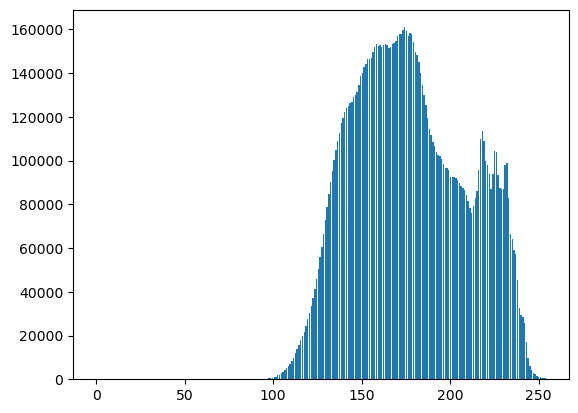

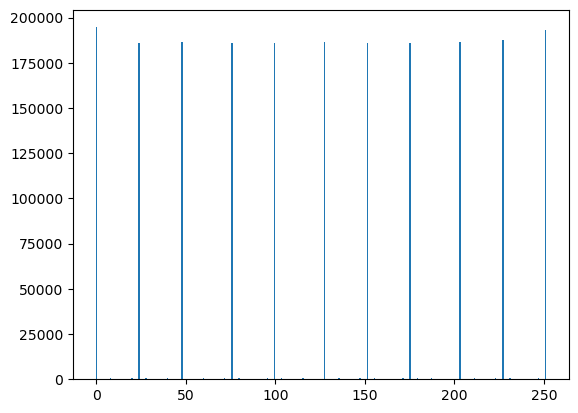

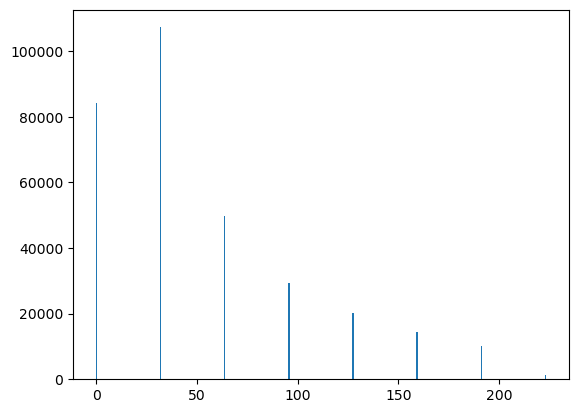

In [20]:
def compute_and_show_histogram(image_path, nbins=256):
    # Read the image
    original_image = io.imread(image_path)
    
    # print(original_image.shape[2])
 
    # Convert to grayscale if the image is in RGB or RGBA format
    if len(original_image.shape) == 3:
        if original_image.shape[2] == 4:  # RGBA image
            original_image = original_image[:, :, :3]  # Discard the alpha channel
        image = rgb2gray(original_image)
    else:
        image = original_image  # Image is already in grayscale
    
    # Compute the histogram
    hist, bins = np.histogram(image, bins=nbins, range=(0, 1))
    showHist(image,(hist,bins[:-1]))



compute_and_show_histogram('histogram/ex1.jpg', nbins=256)
compute_and_show_histogram('histogram/ex2.png', nbins=64)
compute_and_show_histogram('histogram/ex3.png', nbins=8)

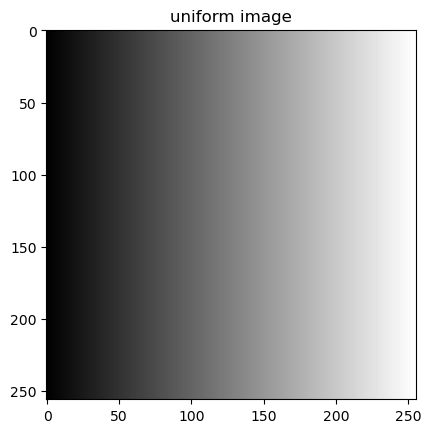

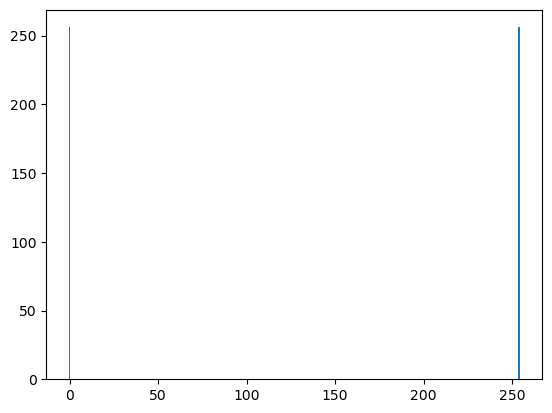

In [21]:
'''
** 2- Draw a grey-scale image that has uniform histogram 
same number of pixels for all intensity levels) using code only. Let the size of the image be 256x256.
use np.ones to draw image with ones.
'''


# Step 1: Create an array of ones with size 256x256
image_size = 256 * 256

# Step 2: Generate pixel values from 0 to 255, each appearing equally
pixel_values = np.arange(256)
uniform_image = np.tile(pixel_values, image_size // 256)

# Step 3: Reshape the array to 256x256
uniform_image = uniform_image.reshape((256, 256))
ShowPixelsValues(uniform_image,"d7kk")
show_images([uniform_image],["uniform image"])

# Compute the histogram
''' 
0 and 255 max and min values of pixels 
diff 255 
bins = 255 
255/255 = 1

0-1 1-2 2-3 4-5 6-7 
'''
hist, bins = np.histogram(uniform_image, bins=255, range=(0, 1))
showHist(uniform_image,(hist,bins[:-1]))

